Need to update spacy pretrained model to large

In [4]:
import pandas as pd
import numpy as np
import spacy

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [1]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

ImportError: cannot import name 'triu' from 'scipy.linalg' (/Users/nitinkumar/Desktop/GenAI/InquiryIQMailer/venv/lib/python3.10/site-packages/scipy/linalg/__init__.py)

In [49]:
df = pd.read_excel("tickets.xlsx")

In [50]:
df.shape

(47499, 15)

In [7]:
df.rename(columns = {'Ticket Category':'label'}, inplace = True)

In [9]:
categories_to_remove = ["Web Services", "na"]

# Use boolean indexing to remove rows with specific contact type
filtered_df = df[~df["ContactType"].isin(categories_to_remove)]

In [10]:
# selected_categories = ["Healthcare Application Issues", "Printer Issues", "Outpatient Issues", "Order Issues", "Access Issues", "Chart Issues", "Information Issues", "Login Issues", "Coverage Issues", "Access Request"]
# filtered_df = filtered_df[filtered_df["label"].isin(selected_categories)]
filtered_df = df[['Student message','label']]
filtered_df

,Student message,label
0,"Dear Team,_x000D_\n_x000D_\nMay I ask you to p...",General
1,I would like to requests to change the electiv...,Delivery
2,"Dear Team,_x000D_\n_x000D_\nMay I ask you to p...",General
3,Is the communication in the below attached fil...,Exams
4,I am unable to login error occurred when login...,LMS
...,...,...
47494,Due to change in my elective from systems and ...,Fee Related
47495,Fee paid and details is attached. Kindly pleas...,Fee Related
47496,WHEN WILL THE SEMESTER 1 RE EXAMINATIONS BE CO...,Exams
47497,My account is archived pls un block I already ...,LMS


In [11]:
filtered_df['label'].value_counts()

label
Exams                 12163
LMS                    8118
General                7873
Delivery               7333
Fee Related            4051
Data and Documents     2561
Refund                 2155
Certificates            987
Convocation             641
Career Guidance         606
Referral                422
Enrollment              373
Content                 214
Microcredentials          1
PG Certificate            1
Name: count, dtype: int64

In [16]:
# min_samples = 350
# df1 = filtered_df[filtered_df.label == "Exams"].sample(min_samples,random_state=2022)
# df5 = filtered_df[filtered_df.label == "LMS"].sample(min_samples,random_state=2022)
# df7 = filtered_df[filtered_df.label == "General"].sample(min_samples,random_state=2022)
# df10 = filtered_df[filtered_df.label == "Fee Related"].sample(min_samples,random_state=2022)
# df2 = filtered_df[filtered_df.label == "Data and Documents"].sample(min_samples,random_state=2022)
# df3 = filtered_df[filtered_df.label == "Refund"].sample(min_samples,random_state=2022)
# df4 = filtered_df[filtered_df.label == "Certificates"].sample(min_samples,random_state=2022)
# df6 = filtered_df[filtered_df.label == "Convocation"].sample(min_samples,random_state=2022)
# df8 = filtered_df[filtered_df.label == "Career Guidance"].sample(min_samples,random_state=2022)
# df9 = filtered_df[filtered_df.label == "Enrollment"].sample(min_samples,random_state=2022)

df_balanced = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis = 0)

"Healthcare Application Issues", "Printer Issues", "Outpatient Issues", "Order Issues", "Access Issues", "Chart Issues", "Information Issues", "Login Issues", "Coverage Issues", "Access Request"

In [17]:
df_balanced['label'].value_counts()

label
Exams                 1000
Data and Documents    1000
Refund                1000
LMS                   1000
General               1000
Fee Related           1000
Certificates           600
Convocation            600
Career Guidance        600
Enrollment             350
Name: count, dtype: int64

In [26]:
df_balanced

,Student message,label,cleaned_txt
5711,When ever I open exam portal it shows I don't ...,Exams,hen ever open exam portal it shows don t have ...
38462,I am not getting an option to register myself ...,Exams,am not getting an option to register myself fo...
11382,I am unable to login to https://student.jgianv...,Exams,am unable to login to https student jgianvesha...
9379,The Zoom Login ID`s are not given for the Feb ...,Exams,he oom ogin s are not given for the eb exam fr...
41650,After making the payment also _x000D_\nuna...,Exams,fter making the payment also _ unable to downl...
...,...,...,...
39767,"Dear Sir,_x000D_\nOn 2nd November 2023 I recei...",Fee Related,ear ir _ n ovember received an email from rega...
15026,"Dear Sir/ Madam,_x000D_\n _x000D_\nMy name is ...",Fee Related,ear ir adam _ _ y name is hikumbutso undwe and...
38265,Unable to generate a QR code to pay through UPI,Fee Related,nable to generate a code to pay through
32697,"Dear Jian,_x000D_\n_x000D_\nAs my paym...",Fee Related,ear ian _ _ s my payment link as been expired ...


In [23]:
# Create a Categorical variable with the selected categories
category_mapping = pd.Categorical(df_balanced["label"], categories=selected_categories, ordered=True)

# Map categories to numbers (0 to 9)
df_balanced["label_num"] = category_mapping.codes
df_balanced[['Summary','label','label_num']][998:1002]

,Summary,label,label_num
13144,unable to launch epic from poc -tsc0ls and t...,Healthcare Application Issues,0
50412,nw- how to copy smart phrases,Healthcare Application Issues,0
11884,unable to print avs from multiple pc's after b...,Printer Issues,1
38112,printer needs to be be reouted to new pc,Printer Issues,1


In [23]:
import re
def clean_text(text):
    '''
    This method generates a clean text and returns a dataframe
    '''
    text = re.sub(r'(\d{3})-(\d{3})-(\d{4})',' ', text)
    text = re.sub(r'(\d{2})/(\d{2})',' ', text)
    text = re.sub(r'\S*@\S*\s?',' ', text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub(r'\'',' ', text)
    text = re.sub(r'<.*?>',' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*',' ', text)
    text = re.sub(r'[^0-9a-z #+_]',' ', text)
    text = re.sub(r'\(.*?\)',' ', text)
    text = re.sub(r'(\w+\.\w+\.com)',' ', text)
    text = re.sub(r'\w+\d+\w+|\w+\d+|\d+\w+',' ', text)
    text = re.sub(r'\d+|\@|\*|\=|\+|\$|\%|\.\.|\#|-|\[|\]|\?|\"',' ', text)
    text = re.sub(r'[ \n]+',' ', text)
    return text.strip().lower()

In [20]:
# nlp = spacy.load("en_core_web_sm")
# def preprocess(text):
#     doc = nlp(text)
#     filtered_token = []
#     for token in doc:
#         if token.is_stop or token.is_punct:
#             continue
#         filtered_token.append(token.lemma_)
        
#     return wv.get_mean_vector(filtered_token)


nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token)  # Include the entire token object

    # Calculate the mean vector using SpaCy's word vectors
    if filtered_tokens:
        mean_vector = sum(token.vector for token in filtered_tokens) / len(filtered_tokens)
    else:
        mean_vector = None  # Handle cases with no filtered tokens

    return mean_vector


In [25]:
df_balanced['Student message'] = df_balanced['Student message'].astype(str)
df_balanced['cleaned_txt'] = df_balanced['Student message'].apply(clean_text)
# df_balanced['preprocess_txt'] = df_balanced['cleaned_txt'].apply(preprocess)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_balanced["cleaned_txt"]
y = df_balanced["label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

   Career Guidance       0.94      0.86      0.90       133
      Certificates       0.79      0.79      0.79       108
       Convocation       0.76      0.78      0.77       123
Data and Documents       0.61      0.66      0.63       216
        Enrollment       0.80      0.05      0.10        77
             Exams       0.68      0.77      0.72       206
       Fee Related       0.69      0.88      0.77       186
           General       0.58      0.48      0.53       196
               LMS       0.64      0.68      0.66       191
            Refund       0.83      0.86      0.85       194

          accuracy                           0.71      1630
         macro avg       0.73      0.68      0.67      1630
      weighted avg       0.71      0.71      0.69      1630



In [58]:
import joblib

# Load the trained model from joblib file
model = joblib.load("model.pkl")
vec = joblib.load("vectorizer.pkl")



# New texts for prediction
new_texts = [
             "I need guidance with my career"]

# Vectorize the new texts using the loaded vectorizer
new_texts_vectorized = vec.transform(new_texts)

# Make predictions using the loaded model
predictions = model.predict(new_texts_vectorized)

print("Predictions:", predictions)


Predictions: ['Career Guidance']


In [48]:

new_texts = ["I want to get assistance in my career to do Phd in AI"]
new_texts_vectorized = vectorizer.transform(new_texts)
predictions = clf.predict(new_texts_vectorized)
print("Predictions:", predictions)





Predictions: ['Career Guidance']


In [25]:
df_balanced[['Incident_ID','Summary','cleaned_txt','label','label_num']]

,Incident_ID,Summary,cleaned_txt,label,label_num
83671,INC2733418,kphc pc - 4 messages appeared today 1/15/19 wi...,kphc pc messages appeared today with past date...,Healthcare Application Issues,0
159641,INC4674911,afl/kphc: please unblock user (jennifer rousch...,afl kphc please unblock user jennifer rousch,Healthcare Application Issues,0
122614,INC4507611,duplicate accession nbm (jst),duplicate accession nbm jst,Healthcare Application Issues,0
28806,INC1986402,sch / kphc inbasket - deployment messages appe...,sch kphc inbasket deployment messages appearin...,Healthcare Application Issues,0
160277,INC5151591,afl/kphc: please create the following pgp per ...,afl kphc please create the following pgp per a...,Healthcare Application Issues,0
...,...,...,...,...,...
153149,INC0562491,"bp cant access 3m coding on pc cnsfoam3943234,...",bp cant access coding on pc it s not launching,Access Request,9
39601,INC1333248,please review bps access,please review bps access,Access Request,9
153138,INC0140987,"bp cant access dragon on pc cnmboam3821780, er...",bp cant access dragon on pc error message inva...,Access Request,9
52908,INC5616723,no access to l&d lead inpatient,no access to l d lead inpatient,Access Request,9


In [ ]:
X = df_balanced['preprocess_txt']
y = df_balanced['label_num']

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2022,
    stratify=y,
)

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((8000,), (2000,), (8000,), (2000,))

In [ ]:
y_train.value_counts()

9    800
6    800
7    800
0    800
1    800
5    800
8    800
4    800
2    800
3    800
Name: label_num, dtype: int64

In [24]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [189]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [274]:
model = GradientBoostingClassifier()
model.fit(X_train_2d,y_train)

GradientBoostingClassifier()

In [275]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_2d,y_train)

KNeighborsClassifier()

In [276]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_2d,y_train)

RandomForestClassifier()

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your preprocessed DataFrame
# df_balanced = ...

# Split data into training and validation sets
train_data, val_data = train_test_split(df_balanced, test_size=0.2, random_state=42)

# Parameters
max_words = 50000  # Maximum number of words in the vocabulary
max_sequence_length = 250  # Maximum sequence length for padding
embedding_dim = 100  # Dimension of word embeddings
hidden_units = 128  # Number of units in LSTM layers
output_dim = 10  # Dimensionality of output

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['cleaned_txt'].values)

# Convert text to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_txt'].values)
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

val_sequences = tokenizer.texts_to_sequences(val_data['cleaned_txt'].values)
val_padded = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(hidden_units, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.LSTM(hidden_units, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(train_padded, train_data['label'], epochs=10, validation_data=(val_padded, val_data['label']))
model.fit(train_padded, Y, epochs=10, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
     

# Evaluate the model
loss, accuracy = model.evaluate(val_padded, val_data['label'])
print(f"Validation loss: {loss:.4f}, Validation accuracy: {accuracy:.4f}")


ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 250}

In [33]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(df_balanced['cleaned_txt'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6710 unique tokens.


In [34]:
X = tokenizer.texts_to_sequences(df_balanced['cleaned_txt'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (10000, 250)


In [35]:
Y = pd.get_dummies(df_balanced['label']).values
Y_classes = pd.get_dummies(df_balanced['label']).columns.tolist()
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (10000, 10)


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8000, 250) (8000, 10)
(2000, 250) (2000, 10)


In [37]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(128, return_sequences=True,dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [2]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 10
batch_size = 32

model = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
     

NameError: name 'model' is not defined

In [1]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: ',accr[0],"\n  Accuracy:", accr[1])

NameError: name 'model' is not defined

In [155]:
accr

[0.48152288794517517, 0.8634999990463257]

In [152]:
pred = (pred > 0.5).astype('uint8')
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       412
           1       0.87      0.66      0.75       382
           2       0.93      0.94      0.94       397
           3       1.00      1.00      1.00       402
           4       0.82      0.84      0.83       352
           5       0.76      0.70      0.73       413
           6       0.89      0.92      0.91       387
           7       0.94      0.91      0.93       413
           8       0.81      0.74      0.78       413
           9       0.98      0.99      0.98       429

   micro avg       0.87      0.86      0.86      4000
   macro avg       0.87      0.86      0.86      4000
weighted avg       0.87      0.86      0.86      4000
 samples avg       0.86      0.86      0.86      4000



C:\Users\NitinKumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
pred = model.predict(X_test)

125/125 [==============================] - 196s 2s/step


In [227]:
df_balanced['predicted_labels'] = [selected_categories[np.argmax(row)] for row in pred]
#df_balanced.to_csv("output_test_lstm.csv")
df_balanced

,Incident_ID,Summary,ContactType,label,label_num,cleaned_txt,preprocess_txt,predicted_labels
83671,INC2733418,kphc pc - 4 messages appeared today 1/15/19 wi...,Phone,Healthcare Application Issues,0,kphc pc messages appeared today with past date...,"[0.0023100306, 0.0020563602, -0.033805262, 0.0...",Access Issues
159641,INC4674911,afl/kphc: please unblock user (jennifer rousch...,Phone,Healthcare Application Issues,0,afl kphc please unblock user jennifer rousch,"[-0.028580325, -0.034724783, -0.0048503876, 0....",Access Issues
122614,INC4507611,duplicate accession nbm (jst),Direct Input,Healthcare Application Issues,0,duplicate accession nbm jst,"[0.0014920966, 0.05120204, 0.009963634, 0.0480...",Access Issues
28806,INC1986402,sch / kphc inbasket - deployment messages appe...,Phone,Healthcare Application Issues,0,sch kphc inbasket deployment messages appearin...,"[0.015064738, 0.022793, -0.0089196125, 0.03076...",Chart Issues
160277,INC5151591,afl/kphc: please create the following pgp per ...,Email,Healthcare Application Issues,0,afl kphc please create the following pgp per a...,"[0.0064416626, -0.010304711, 0.0069559594, 0.0...",Access Issues
...,...,...,...,...,...,...,...,...
153149,INC0562491,"bp cant access 3m coding on pc cnsfoam3943234,...",Phone,Access Request,9,bp cant access coding on pc it s not launching,"[-0.013910068, -0.003852437, -0.0031259346, 0....",Printer Issues
39601,INC1333248,please review bps access,Phone,Access Request,9,please review bps access,"[-0.09269019, -0.02601897, -0.026966868, 0.027...",Printer Issues
153138,INC0140987,"bp cant access dragon on pc cnmboam3821780, er...",Phone,Access Request,9,bp cant access dragon on pc error message inva...,"[0.0015341126, -0.03102137, -0.002042006, 0.02...",Printer Issues
52908,INC5616723,no access to l&d lead inpatient,Phone,Access Request,9,no access to l d lead inpatient,"[-0.034198254, 0.047217555, -0.0023042865, -0....",Printer Issues


Text(69.0, 0.5, 'Truth')

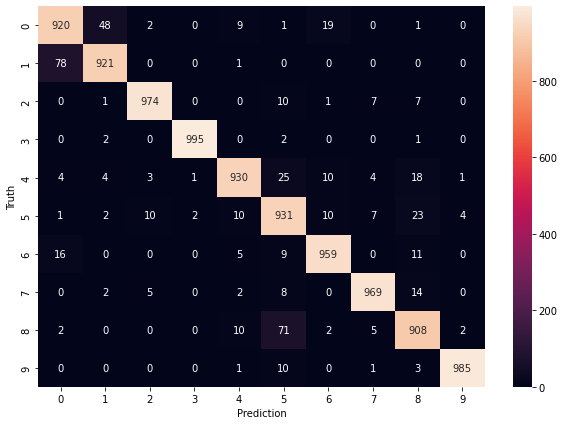

In [255]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_pred_classes)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [103]:
from sklearn.metrics import classification_report
# evaluate_testset = model.evaluate(X_test, Y_test)

y_pred = model.predict(X_test)

        

y_actual = []

y_pred_classes = []

y_pred_prob = []

for row in range(len(y_pred)):
    y_actual.append(Y_classes[np.argmax(Y[row])])
    y_pred_classes.append(Y_classes[np.argmax(y_pred[row])])
    y_pred_prob.append(np.max(y_pred[row]))

        

# f1score = f1_score(y_actual, y_pred_classes, average='weighted', zero_division=0)

# precisionscore = precision_score(y_actual, y_pred_classes, average='weighted', zero_division=0)
# recallscore = recall_score(y_actual, y_pred_classes, average='weighted', zero_division=0)

        

print(classification_report(y_actual, y_pred_classes))

63/63 [==============================] - 15s 238ms/step
                               precision    recall  f1-score   support

                Access Issues       0.00      0.00      0.00         0
               Access Request       0.00      0.00      0.00         0
                 Chart Issues       0.00      0.00      0.00         0
              Coverage Issues       0.00      0.00      0.00         0
Healthcare Application Issues       0.53      0.12      0.20      1000
           Information Issues       0.00      0.00      0.00         0
                 Login Issues       0.00      0.00      0.00         0
                 Order Issues       0.00      0.00      0.00         0
            Outpatient Issues       0.00      0.00      0.00         0
               Printer Issues       0.51      0.10      0.17      1000

                     accuracy                           0.12      2000
                    macro avg       0.10      0.02      0.04      2000
                 we

C:\Users\NitinKumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NitinKumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NitinKumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
evaluate_testset = model.evaluate(X_test, Y_test)

NameError: name 'model' is not defined

In [250]:
df_balanced['Actual_Label'] = y_actual
df_balanced['Predicted_Label'] = y_pred_classes
df_balanced.to_csv("output_test.csv")
df_balanced

,Incident_ID,Summary,ContactType,cleaned_txt,preprocess_txt,Actual_Label,Predicted_Label
83671,INC2733418,kphc pc - 4 messages appeared today 1/15/19 wi...,Phone,kphc pc messages appeared today with past date...,"[0.0023100306, 0.0020563602, -0.033805262, 0.0...",Healthcare Application Issues,Healthcare Application Issues
159641,INC4674911,afl/kphc: please unblock user (jennifer rousch...,Phone,afl kphc please unblock user jennifer rousch,"[-0.028580325, -0.034724783, -0.0048503876, 0....",Healthcare Application Issues,Healthcare Application Issues
122614,INC4507611,duplicate accession nbm (jst),Direct Input,duplicate accession nbm jst,"[0.0014920966, 0.05120204, 0.009963634, 0.0480...",Healthcare Application Issues,Healthcare Application Issues
28806,INC1986402,sch / kphc inbasket - deployment messages appe...,Phone,sch kphc inbasket deployment messages appearin...,"[0.015064738, 0.022793, -0.0089196125, 0.03076...",Healthcare Application Issues,Information Issues
160277,INC5151591,afl/kphc: please create the following pgp per ...,Email,afl kphc please create the following pgp per a...,"[0.0064416626, -0.010304711, 0.0069559594, 0.0...",Healthcare Application Issues,Healthcare Application Issues
...,...,...,...,...,...,...,...
153149,INC0562491,"bp cant access 3m coding on pc cnsfoam3943234,...",Phone,bp cant access coding on pc it s not launching,"[-0.013910068, -0.003852437, -0.0031259346, 0....",Access Request,Access Request
39601,INC1333248,please review bps access,Phone,please review bps access,"[-0.09269019, -0.02601897, -0.026966868, 0.027...",Access Request,Access Request
153138,INC0140987,"bp cant access dragon on pc cnmboam3821780, er...",Phone,bp cant access dragon on pc error message inva...,"[0.0015341126, -0.03102137, -0.002042006, 0.02...",Access Request,Access Request
52908,INC5616723,no access to l&d lead inpatient,Phone,no access to l d lead inpatient,"[-0.034198254, 0.047217555, -0.0023042865, -0....",Access Request,Access Request


In [277]:
print("Gradient Boosting Classifier Score : ", model.score(X_test_2d,y_test), "\nKNearestNeighours Score : ", knn_model.score(X_test_2d,y_test),"\nRandom Forest Score : ", rfc_model.score(X_test_2d,y_test))

Gradient Boosting Classifier Score :  0.786 
KNearestNeighours Score :  0.7165 
Random Forest Score :  0.7685


In [290]:
X_2d = np.stack(X)

In [311]:
df_balanced['predicted_label_num'] = model.predict(X_2d)

In [313]:
df_balanced['predicted_label'] = pd.Categorical.from_codes(df_balanced["predicted_label_num"], categories=category_mapping.categories)
df_balanced.to_csv("output_test.csv")

In [194]:
y_pred = model.predict(X_test_2d)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       200
           1       0.96      0.93      0.94       200
           2       0.67      0.68      0.67       200
           3       0.91      0.84      0.88       200
           4       0.68      0.64      0.66       200
           5       0.93      0.94      0.93       200
           6       0.58      0.66      0.62       200
           7       0.82      0.84      0.83       200
           8       0.99      0.94      0.97       200
           9       0.69      0.73      0.71       200

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



Text(69.0, 0.5, 'Truth')

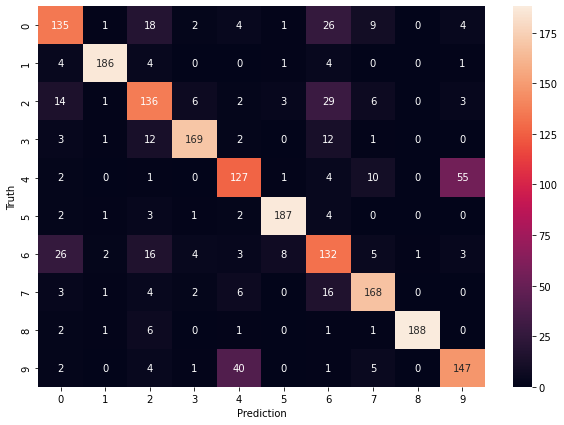

In [294]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [298]:
df_balanced.drop(['clean', 'preprocess'], axis=1, inplace=True)


Data Ingestion from Storage Index

In [9]:
import pandas as pd
import numpy as np
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from datetime import datetime
import re
import collections

In [18]:
# Extracting data from elasticsearch
es =  Elasticsearch(hosts=['https://ops-analytics.appl.kp.org:9200'],verify_certs=False,timeout=600, http_auth=("G073080","Rakesh@nktyagi423") )
data = helpers.scan(
    es,
    index="storage-ipc-storage-v1",
    preserve_order=True,
    query={
        "query": {
            "range": {
                "DateTime": {
                    "gte": "now-30d/d",  # // Start date is 30 days ago
                    "lte": "now/d"      #  // End date is today
                    }
                }
            }
        },
    )

# data1 = helpers.scan(
#     es,
#     index="storage-idw-san-perf*",
#     preserve_order=True,
#     query={
#   "query": {
#     "bool": {
#      "filter": [
#                        {
#                           "terms": {
#                             "RecordType.keyword" : ["ControllerReadRequests_IOPS"]
#                           }
#                         }
#                         ]
#     }
#   },
#   }  )
from pandas import json_normalize
data = list(data)
Incidents=json_normalize(data)

## Removing _source
Incidents.columns = [x.strip().replace('_source.', '') for x in Incidents.columns]
## Dropping elastic document related columns. These columns are added by elastic and not part of the actual data
Incidents.drop(['_id','_index','_score','_type','@timestamp','@version'], axis=1, inplace=True)


C:\Users\G073080a\AppData\Local\Temp\18\ipykernel_10216\1978361561.py:2: DeprecationWarning: The 'timeout' parameter is deprecated in favor of 'request_timeout'
  es =  Elasticsearch(hosts=['https://ops-analytics.appl.kp.org:9200'],timeout=600, http_auth=("G073080","Rakesh@nktyagi423") )
C:\Users\G073080a\AppData\Local\Temp\18\ipykernel_10216\1978361561.py:2: DeprecationWarning: The 'http_auth' parameter is deprecated. Use 'basic_auth' or 'bearer_auth' parameters instead
  es =  Elasticsearch(hosts=['https://ops-analytics.appl.kp.org:9200'],timeout=600, http_auth=("G073080","Rakesh@nktyagi423") )


ConnectionError: Connection error caused by: ConnectionError(Connection error caused by: NewConnectionError(<elastic_transport._node._urllib3_chain_certs.HTTPSConnection object at 0x000001E8BA7448E0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it))

In [17]:
data

<generator object scan at 0x000001E8BA503C30>

In [7]:
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc.sents:
        filtered_token.append(token)
    return filtered_token

In [8]:
preprocess("This restaurant is awesome")

[This restaurant is awesome]

In [10]:
pipe(df['Summary'].apply(preprocess))

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'int'>

In [13]:
from transformers.pipelines.pt_utils import KeyDataset
import datasets

dataset = datasets.load_dataset("imdb", name="plain_text", split="unsupervised")
pipe = pipeline("text-classification", device=0)
for out in pipe(KeyDataset(dataset, "text"), batch_size=8, truncation="only_first"):
    print(out)

ModuleNotFoundError: No module named 'torch'

In [1]:
from transformers import TFAutoModel
bert_model = TFAutoModel.from_pretrained("bert-base-cased")

C:\Users\NitinKumar\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\NitinKumar\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [2]:
print(type(bert_model))

<class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>


In [1]:
from datasets import load_dataset

In [3]:
data = load_dataset('glue','mrpc')
data.shape

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

{'train': (3668, 4), 'validation': (408, 4), 'test': (1725, 4)}

In [12]:
data.num_rows

{'train': 3668, 'validation': 408, 'test': 1725}